Import Libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

In [5]:
gdp_df = pd.read_csv("data/gdp_per_capita.csv")

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN


In [ ]:
gdp_df[0:10]

In [8]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN
6500,footnoteSeqID,Footnote,NaN,NaN
6501,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [9]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN
6500,footnoteSeqID,Footnote,NaN,NaN
6501,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [11]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN


In [12]:
#Skip footer
gdp_df= pd.read_csv("data/gdp_per_capita.csv", skipfooter=2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [13]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


Gives the number of rows, columns and datatypes

In [14]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 4 columns):
Country or Area    6500 non-null object
Year               6500 non-null int64
Value              6500 non-null float64
Value Footnotes    1 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 203.2+ KB


Gives the number of rows and columns as (total row number, total column number)

In [15]:
gdp_df.shape

(6500, 4)

.count() gives the details- number of rows in each column 

In [16]:
gdp_df.count()

Country or Area    6500
Year               6500
Value              6500
Value Footnotes       1
dtype: int64

Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’

In [17]:
gdp_df= gdp_df.drop("Value Footnotes", axis=1)

In [18]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


In [19]:
gdp_df=gdp_df.rename(columns={"Country or Area": "Country", "Year":"Year", "Value":"GDP_Per_Capita"})

In [20]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset. However, we must first do a little preparation of the country names in `gdp_df` so that we can merge the two correctly:
Change "CÃ´te d'Ivoire" to "Ivory Coast"

In [21]:
gdp_df['Country']= gdp_df.replace(to_replace="CÃ´te d'Ivoire", value="Ivory Coast")

In [26]:
#Change "CuraÃ§ao" to "Curaçao", 
#Change "SÃ£o TomÃ© and Principe" to "Sao Tome and Principe"
#Change "Sint Maarten (Dutch part)" to "Sint Maarten"

gdp_df['Country']= gdp_df.replace(to_replace="CuraÃ§ao", value="Curaçao")

gdp_df["Country"]=gdp_df.replace(to_replace="SÃ£o TomÃ© and Principe", value="Sao Tome and Principe")

gdp_df["Country"]=gdp_df.replace(to_replace="Sint Maarten (Dutch part)", value="Sint Maarten")

In [ ]:
gdp_df.loc[gdp_df['Country'] == "Ivory Coast"]

In [ ]:
gdp_df.loc[gdp_df['Country'] == "Sao Tome and Principe"]

In [ ]:
gdp_df.loc[gdp_df['Country'] == "Sint Maarten"]

Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

read the continents.csv file and name it as con_df

In [28]:
con_df=pd.read_csv("data/continents.csv")

looking at info in continents file- just an overview

In [29]:
con_df.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [30]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
Continent    216 non-null object
Country      216 non-null object
dtypes: object(2)
memory usage: 3.5+ KB


Merging continents.csv and gdp_per_capital.csv files keeping only the countries

In [31]:
gdp_df = pd.merge(gdp_df, con_df, on="Country")

In [32]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


Continent is currently stored as an "object" type. Since there are only five possible values for continent, we can convert it to categorical to save some memory usage. Do the following:
Use `.info()` on gdp_df. Note the memory usage. 

check the memory usage using .info()

In [33]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5225 entries, 0 to 5224
Data columns (total 4 columns):
Country           5225 non-null object
Year              5225 non-null int64
GDP_Per_Capita    5225 non-null float64
Continent         5225 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 204.1+ KB


By changing type to categorical, we can not only save on memory usage, but can save on CPU time. To see this, we will use the `%%time` cell magic. In a new cell, run the following commands: 
`%%time`    
    `gdp_df.groupby('Continent').GDP_Per_Capita.mean()`  
    This will return the average GDP_Per_Capita by continent, across all years and will measure how long it took to run.

In [34]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 1.54 ms, sys: 841 µs, total: 2.38 ms
Wall time: 3.03 ms


Continent
Africa            4588.289835
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

Convert the continent which is object type to categorical

In [35]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5225 entries, 0 to 5224
Data columns (total 4 columns):
Country           5225 non-null object
Year              5225 non-null int64
GDP_Per_Capita    5225 non-null float64
Continent         5225 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 204.1+ KB


In [36]:
gdp_df["Continent"]=gdp_df["Continent"].astype('category')

In [37]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [38]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5225 entries, 0 to 5224
Data columns (total 4 columns):
Country           5225 non-null object
Year              5225 non-null int64
GDP_Per_Capita    5225 non-null float64
Continent         5225 non-null category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 168.6+ KB


In [39]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 1.44 ms, sys: 1.02 ms, total: 2.46 ms
Wall time: 1.89 ms


Continent
Africa            4588.289835
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

Group the countries within a continent. The nunique looks for unique values. Without this, it will just count all the number of countries. eg. Without nunique function, it will provide africa has 1400 countries

In [40]:
gdp_country_gp=gdp_df.groupby(['Continent'])['Country'].nunique()

In [41]:
gdp_country_gp.head()

Continent
Africa           53
Asia             44
Europe           45
North America    28
Oceania          14
Name: Country, dtype: int64

the groupby function with both continent and country grouping, will give the output dataframe as series. The type( ) will show the datatype of the output dataframe, in this case, its gdp_country_gp

In [42]:
type(gdp_country_gp)

pandas.core.series.Series

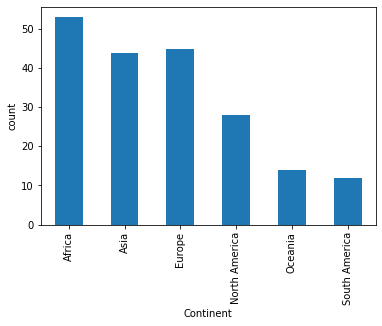

In [43]:
gdp_country_gp.plot(kind='bar')
plt.ylabel('count');

In [44]:
gdp_df['Country'].nunique()

196

In [45]:
gdp_df.max()

Country                Zimbabwe
Year                       2017
GDP_Per_Capita           134960
Continent         South America
dtype: object

In [46]:
gdp_df.min()

Country           Afghanistan
Year                     1990
GDP_Per_Capita        268.862
Continent              Africa
dtype: object

In [47]:
gdp_2014=gdp_df.query('Year== 2014')

In [48]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita,Continent
3,Afghanistan,2014,1795.735834,Asia
19,Albania,2014,10700.522802,Europe
47,Algeria,2014,13549.025150,Africa
75,Angola,2014,6813.052106,Africa
103,Antigua and Barbuda,2014,20820.551057,North America


Use `.describe()` to find the summary statistics for GDP per capita in 2014.

In [49]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,193.0,193.000000
mean,2014.0,18784.375312
std,0.0,20682.299929
min,2014.0,377.908916
25%,2014.0,4161.895062
50%,2014.0,11887.389712
75%,2014.0,26442.682003
max,2014.0,130439.187070


Which country had the highest GDP per capita in 2014? Which had the lowest? Find the top 5 countries by GDP per capita in 2014.

In [50]:
gdp_2014.nlargest(5,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Continent
2731,"Macao SAR, China",2014,130439.187070,Asia
3779,Qatar,2014,116693.507701,Asia
2703,Luxembourg,2014,92349.186486,Europe
4082,Singapore,2014,81965.361071,Asia
655,Brunei,2014,76448.593329,Asia


Add a column to your 2014 dataframe called 'GDP_Group'. In this column, assign each country to one of three categories: "Low" if the country's GDP Per Capita is below the 25th percentile of GDP Per Capita, "Medium" if it is between the 25th and 75th percentile, and "High" if it is above the 75th percentile. How do the continents differ in terms of numbers of countries in each group?

In [51]:
def GDP(c):
    
    if c["GDP_Per_Capita"] < gdp_2014["GDP_Per_Capita"].quantile(0.25):
        return "Low"
    elif c["GDP_Per_Capita"]> gdp_2014["GDP_Per_Capita"].quantile(0.25) and c["GDP_Per_Capita"]< gdp_2014["GDP_Per_Capita"].quantile(0.75):
        return "Medium"
    else:
        return "High"


In [52]:
gdp_2014["GDP_Group"]=gdp_2014.apply(GDP, axis=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). What can you say about the distribution of GDP per capita figures in 2014? 

Text(0.5, 1.0, 'GDP_Per_Capita for 2014')

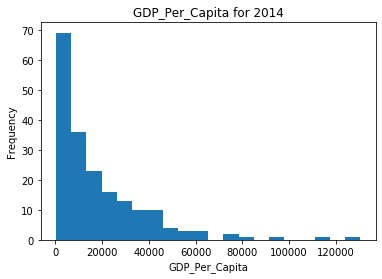

In [53]:
plt.hist(gdp_2014["GDP_Per_Capita"],bins=20)
plt.xlabel("GDP_Per_Capita")
plt.ylabel("Frequency")
plt.title("GDP_Per_Capita for 2014")

distribution is right skewed

Using the scipy function, find the skewness of the GDP per Capita values for 2014. You may not be familiar with this particular statistic, so if you're not, do a little research. Does the value you got make sense considering the histogram you plotted above?

In [54]:
stats.skew(gdp_2014["GDP_Per_Capita"])

2.226222580604096

yes, the histogram is right skewed and the value represent a right skewed distribution

Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

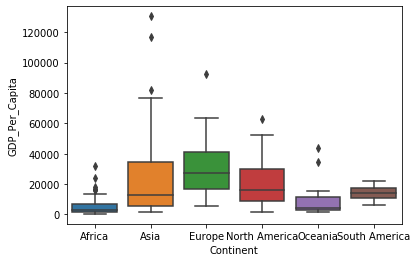

In [55]:
sns.boxplot(x=gdp_2014["Continent"], y=gdp_2014["GDP_Per_Capita"])

The GDP_Per_Capita is higher for Europe.

Pivot the data (using the pandas `.pivot()` method) so that we can calculate % change in GDP Per Capita from 1990 to 2017 - drop any countries that are missing GDP numbers for at least one of these two years.

In [56]:
gdp_df_pivot=gdp_df.pivot(index="Country", columns="Year", values="GDP_Per_Capita")

In [57]:
gdp_df_pivot=gdp_df_pivot[[1990, 2017]]

In [58]:
gdp_df_pivot=gdp_df_pivot.dropna(axis= 0)

In [59]:
gdp_df_pivot.head()

Year,1990,2017
Country,,
Albania,4458.247662,11803.283883
Algeria,10297.842349,13876.294642
Angola,4761.229638,6044.972035
Antigua and Barbuda,17472.946483,22855.748017
Argentina,11372.823108,18945.144022


In [60]:
gdp_tot_country=len(gdp_df_pivot.index)
#gives the total number of countries (country is the index here) in the gdp dataframe

In [61]:
gdp_df_pivot['percent_change']=(gdp_df_pivot[2017]-gdp_df_pivot[1990])/gdp_df_pivot[1990]

In [62]:
gdp_df_pivot.head()

Year,1990,2017,percent_change
Country,,,
Albania,4458.247662,11803.283883,1.647516
Algeria,10297.842349,13876.294642,0.347495
Angola,4761.229638,6044.972035,0.269624
Antigua and Barbuda,17472.946483,22855.748017,0.308065
Argentina,11372.823108,18945.144022,0.665826


In [63]:
#gdp_df_pivot.pct_change(axis='columns') this will give the same result as above

What percentage of countries or areas experienced a positive % change in GDP per capita? What percentage experienced a negative % change?

In [64]:
#gdp_percentcountry gives the countries with positive GDP
#gdp_positivepercent_country gives the count of countries with positive GDP
gdp_percentcountry=gdp_df_pivot.query('percent_change > 0')
gdp_positivepercent_country=gdp_percentcountry["percent_change"].count()
print(gdp_positivepercent_country)

146


In [65]:
#gdp_pospercentcountry gives the percentage of countries with positive GDP
gdp_pospercentcountry=(gdp_positivepercent_country/gdp_tot_country)*100

In [66]:
print(gdp_pospercentcountry)

89.02439024390245


What percentage experienced a negative % change?

In [67]:
gdp_negpercentcountry=gdp_df_pivot.query('percent_change < 0')
gdp_negpercent_country=gdp_negpercentcountry["percent_change"].count()

In [68]:
gdp_negpercentcountry=(gdp_negpercent_country/gdp_tot_country)*100

In [69]:
print(gdp_negpercentcountry)

10.975609756097562


Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita from 1990 to 2017.

In [70]:
gdp_df_pivot[gdp_df_pivot['percent_change']==max(gdp_df_pivot['percent_change'])]

Year,1990,2017,percent_change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,20.909735


In [71]:
gdp_df_pivotallyears=gdp_df.pivot(index="Country", columns="Year", values="GDP_Per_Capita")
gdp_df_pivotallyears.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1267.644939,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636
Albania,4458.247662,3229.250516,3015.391747,3323.864796,3622.007546,4129.975847,4533.894914,4064.133302,4450.923069,5056.567135,...,9154.714872,9525.372374,9927.631333,10207.753519,10369.562385,10492.670315,10700.522802,10971.046329,11356.719009,11803.283883
Algeria,10297.842349,9927.003266,9870.942241,9451.329091,9174.299927,9342.777721,9556.806523,9507.117532,9843.132467,10015.260962,...,12707.831354,12694.745562,12920.751516,13046.369962,13226.025385,13322.569483,13549.025150,13774.299412,13939.940523,13876.294642
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6474.376423,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035
Antigua and Barbuda,17472.946483,17616.926677,17515.821953,18074.531028,18871.807320,17663.771366,18427.111846,19020.307728,19506.709858,19837.177345,...,26110.658806,22592.413330,20660.418279,19953.192771,20388.798658,20121.250141,20820.551057,21426.324931,22393.996146,22855.748017


In [72]:
gdp_df_pivotallyears_nona=gdp_df_pivotallyears.dropna(axis= 0)

In [73]:
gdp_df_pivotallyears_nona.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4458.247662,3229.250516,3015.391747,3323.864796,3622.007546,4129.975847,4533.894914,4064.133302,4450.923069,5056.567135,...,9154.714872,9525.372374,9927.631333,10207.753519,10369.562385,10492.670315,10700.522802,10971.046329,11356.719009,11803.283883
Algeria,10297.842349,9927.003266,9870.942241,9451.329091,9174.299927,9342.777721,9556.806523,9507.117532,9843.132467,10015.260962,...,12707.831354,12694.745562,12920.751516,13046.369962,13226.025385,13322.569483,13549.025150,13774.299412,13939.940523,13876.294642
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6474.376423,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035
Antigua and Barbuda,17472.946483,17616.926677,17515.821953,18074.531028,18871.807320,17663.771366,18427.111846,19020.307728,19506.709858,19837.177345,...,26110.658806,22592.413330,20660.418279,19953.192771,20388.798658,20121.250141,20820.551057,21426.324931,22393.996146,22855.748017
Argentina,11372.823108,12238.788847,13032.793286,13919.403900,14546.538787,13959.999657,14556.733575,15556.017565,15973.067259,15261.441992,...,18575.887723,17302.654149,18911.823188,19817.450477,19392.309793,19637.755383,18935.002497,19243.579469,18645.091851,18945.144022


In [74]:
gdp_df_pivotallyears_nona['percent_change']=(gdp_df_pivotallyears_nona[2017]-gdp_df_pivotallyears_nona[1990])/gdp_df_pivotallyears_nona[1990]
gdp_df_pivothighGDP=gdp_df_pivotallyears_nona[gdp_df_pivotallyears_nona['percent_change']==max(gdp_df_pivotallyears_nona['percent_change'])]
gdp_df_pivotallyears_nona.columns

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Index([            1990,             1991,             1992,             1993,
                   1994,             1995,             1996,             1997,
                   1998,             1999,             2000,             2001,
                   2002,             2003,             2004,             2005,
                   2006,             2007,             2008,             2009,
                   2010,             2011,             2012,             2013,
                   2014,             2015,             2016,             2017,
       'percent_change'],
      dtype='object', name='Year')

In [75]:
gdp_df_pivothighGDP=gdp_df_pivothighGDP.iloc[:,:-1]

In [76]:
gdp_df_pivothighGDP=gdp_df_pivothighGDP.melt()

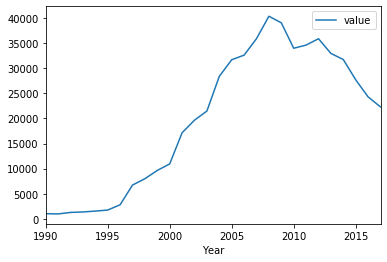

In [77]:
gdp_df_pivothighGDP.plot(x="Year",y="value")

Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

In [78]:
gdp_df_pivotallyrs_sort=gdp_df_pivotallyears_nona.sort_values(by=['percent_change'],ascending=False)
gdp_df_pivotallyrs_sort.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,percent_change
Country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1017.764136,975.558189,1272.159060,1365.588482,1538.475957,1743.205357,2796.398459,6721.724501,7991.571984,9640.704755,...,39060.913034,33990.146771,34622.116266,35887.816302,32959.108100,31743.410748,27708.638182,24296.603580,22298.942144,20.909735
China,1521.963868,1640.874263,1851.315492,2083.952315,2329.474589,2556.604860,2781.130626,3006.918054,3211.623211,3428.063172,...,8626.532479,9498.079744,10355.495713,11115.110675,11919.607104,12725.089099,13534.846237,14368.630801,15253.993071,9.022572
Myanmar,730.228038,715.865296,775.554961,813.030659,863.890169,913.008761,959.793711,1001.087335,1046.243846,1146.433298,...,3387.818242,3688.491636,3864.959768,4114.227664,4423.146388,4737.459861,5030.264149,5288.570199,5610.324700,6.682976
Vietnam,1457.594613,1512.269780,1609.492026,1705.335543,1822.025810,1962.305534,2112.914861,2253.625263,2353.555715,2437.195887,...,4207.756178,4433.467826,4662.223052,4856.000604,5065.643427,5312.492183,5608.471859,5895.628492,6233.485045,3.276556
Bhutan,2353.610673,2327.227587,2434.829091,2492.145596,2618.981531,2789.968358,2908.002351,3007.377004,3113.738475,3283.766911,...,6163.403237,6814.294281,7269.343133,7547.825638,7615.588686,7954.380855,8380.123518,8943.849139,9246.676763,2.928720


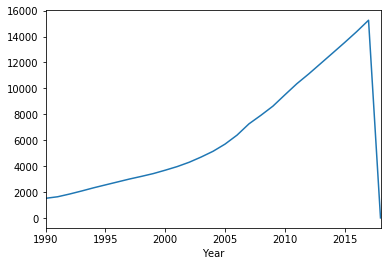

In [79]:
gdp_df_pivot_sec_highGDP=gdp_df_pivotallyrs_sort.iloc[1,:]
gdp_df_pivot_sec_highGDP.plot()

How do the trends in these countries compare?Equatorial Guinea had the peak GDP sometime between 2005 and 2010 and gradually decreased while China, the country with second highest GDP peaked around 2015 and decreased tremendously

Read in internet_use.csv into a DataFrame called `internet_df`. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your `read_csv()` call to fix this. Again, **do not** modify the original datasets. 

In [80]:
internet_df=pd.read_csv('data/internet_use.csv', nrows=4495)

In [81]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [82]:
#How many rows and columns does this new dataset have? What are the types of its columns?
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
Country or Area    4495 non-null object
Year               4495 non-null int64
Value              4495 non-null float64
Value Footnotes    948 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.5+ KB


In [83]:
#Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.
internet_df=internet_df.drop("Value Footnotes", axis=1)
internet_df=internet_df.rename(columns={'Country or Area': 'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'})

In [84]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [85]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [86]:
#Merge `gdf_df` and `internet_df` (on Country and Year) into a single DataFrame named `gdp_and_internet_use`.
#Keep only countries and years that appear in both table
gdp_and_internet_use=pd.merge(gdp_df, internet_df, on=('Country','Year'))

In [87]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [88]:
#Look at the first five rows of your new data frame to confirm it merged correctly. 
#Also, check the last five rows to make sure the data is clean and as expected.
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3528,Zimbabwe,1997,3036.422224,Africa,0.033080
3529,Zimbabwe,1996,2985.856605,Africa,0.016790
3530,Zimbabwe,1995,2736.486436,Africa,0.007684
3531,Zimbabwe,1994,2768.309953,Africa,0.001739
3532,Zimbabwe,1990,2819.549467,Africa,0.000000


In [89]:
#Create a new DataFrame, named `gdp_and_internet_use_2014` by extracting data for the year 2014 from `gdp_and_internet_use`. 
#What is the mean internet users percentage in 2014? 

In [90]:
gdp_and_internet_use_2014=gdp_and_internet_use.query("Year==2014")

In [91]:
gdp_and_internet_use_2014.describe()

,Year,GDP_Per_Capita,Internet_Users_Pct
count,165.0,165.000000,165.000000
mean,2014.0,18323.353742,44.550727
std,0.0,19134.510956,29.321835
min,2014.0,377.908916,1.140000
25%,2014.0,4161.895062,17.490000
50%,2014.0,11887.389712,43.550000
75%,2014.0,26023.697849,70.220000
max,2014.0,116693.507701,98.160000


#How many countries have at least 90% internet users in 2014?

In [92]:
gdp_and_internet_use_2014.query('Internet_Users_Pct >= 90').count()

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64

Find the countries that had the top 5 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. What trends do you notice?

In [93]:
gdp_internet_use_2014_largest=gdp_and_internet_use_2014.nlargest(5, 'GDP_Per_Capita')
gdp_internet_use_2014_largest

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186486,Europe,94.67
2779,Singapore,2014,81965.361071,Asia,82.00
1685,Kuwait,2014,72588.486007,Asia,78.70
2310,Norway,2014,63419.314779,Europe,96.30


In [96]:
gdp_internet_largest2014=gdp_and_internet_use.query('Country == "Singapore" or Country =="Kuwait" or Country == "Qatar" or Country == "Luxembourg" or Country =="Norway"')
gdp_internet_largest2014.info()
#gdp_internet_largest2014 contains countries whose GDP_Per_Capita has been largest in 2014. this dataframe also
#contains all the years

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1685 to 2803
Data columns (total 5 columns):
Country               109 non-null object
Year                  109 non-null int64
GDP_Per_Capita        109 non-null float64
Continent             109 non-null category
Internet_Users_Pct    109 non-null float64
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 4.6+ KB


Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. What trends do you notice?
ans: percentage of internet users have increased over the years

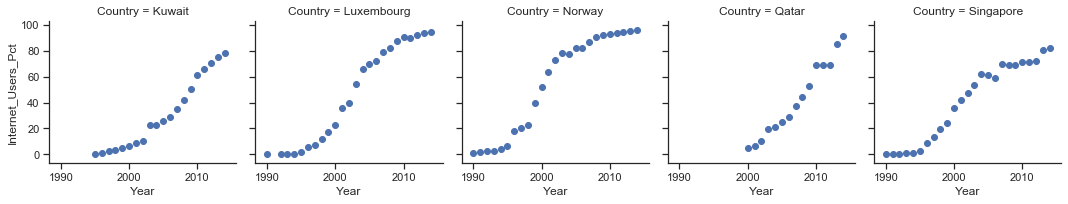

In [97]:
sns.set(style="ticks")
g=sns.FacetGrid(gdp_internet_largest2014, col="Country")
g.map(plt.scatter, "Year", "Internet_Users_Pct")
#source: https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6

Create a scatter plot of Internet Use vs GDP per Capita for the year 2014.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


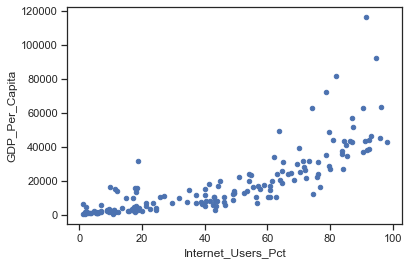

In [98]:
gdp_and_internet_use_2014.plot(kind='scatter', x="Internet_Users_Pct", y="GDP_Per_Capita")

Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?
Answer: the two variables are related to each other positively in the year 2014

In [99]:
gdp_and_internet_use_2014[["GDP_Per_Capita", "Internet_Users_Pct"]].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.788933
Internet_Users_Pct,0.788933,1.000000


Using the statsmodels library, create an ordinary linear regression model with independent variable GDP per capita and dependent variable internet users percentage for the year 2014. Be sure to include an intercept term. Print the model summary. What R^2 value do you get for this model? What is the meaning of this number?
answer - R^2 is 0.622
Higher R^2 means the residual sum of squares is smaller and so the variance is lesser and the model is a better fit model

In [114]:
X=gdp_and_internet_use_2014["GDP_Per_Capita"]
X = sm.add_constant(X)
X.head()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,GDP_Per_Capita
0,1.0,1795.735834
13,1.0,10700.522802
34,1.0,13549.025150
56,1.0,6813.052106
76,1.0,20820.551057


In [115]:
y = gdp_and_internet_use_2014["Internet_Users_Pct"]
model = sm.OLS(y, X)
ols_result = model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:     Internet_Users_Pct   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           2.65e-36
Time:                        18:54:52   Log-Likelihood:                -710.70
No. Observations:                 165   AIC:                             1425.
Df Residuals:                     163   BIC:                             1432.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.3984      1.951     11.

Add a column to `gdp_and_internet_use_2014` and calculate the logarithm of GDP per capita. 
Find the correlation between the log of GDP per capita and internet users percentage. Run an ordinary linear regression with response variable internet users and explanatory variable the log of the GDP per capita, and view the model summary. What is the meaning of the coefficients you get? Which of the two models that you created appears to do a better job?

In [102]:
gdp_and_internet_use_2014["log_GDP"]= np.log(gdp_and_internet_use_2014["GDP_Per_Capita"])
gdp_and_internet_use_2014.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,log_GDP
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.522802,Europe,60.10,9.278048
34,Algeria,2014,13549.025150,Africa,18.09,9.514070
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20820.551057,North America,64.00,9.943696


In [103]:
#Find the correlation between the log of GDP per capita and internet users percentage
gdp_and_internet_use_2014[["log_GDP", "Internet_Users_Pct"]].corr()

,log_GDP,Internet_Users_Pct
log_GDP,1.000000,0.878314
Internet_Users_Pct,0.878314,1.000000


In [116]:

#Run an ordinary linear regression with response variable internet users and explanatory variable the log of 
#the GDP per capita, and view the model summary. 
X= gdp_and_internet_use_2014["log_GDP"]
X=sm.add_constant(X)
X.head()

,const,log_GDP
0,1.0,7.493170
13,1.0,9.278048
34,1.0,9.514070
56,1.0,8.826595
76,1.0,9.943696


In [117]:
y= gdp_and_internet_use_2014["Internet_Users_Pct"]
model = sm.OLS(y, X)
ols_result = model.fit()
print(ols_result.summary())
#What is the meaning of the coefficients you get? 
#there is an  
#Which of the two models that you created appears to do a better job?
#after taking the log, the model does a better job since the R^2 is better

                            OLS Regression Results                            
Dep. Variable:     Internet_Users_Pct   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     550.1
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           4.07e-54
Time:                        18:56:18   Log-Likelihood:                -669.28
No. Observations:                 165   AIC:                             1343.
Df Residuals:                     163   BIC:                             1349.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -156.3630      8.636    -18.107      0.0

Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [110]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [ ]:
gdp_and_internet_use.query('Country== "United States"')

In [113]:
gdp_and_internet_use[['Internet_Users_Pct', 'GDP_Per_Capita']].corr()
#Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?
#it is hard to say if they are correlated because its 0.58. A model may need to be created 
#plotted before concluding anything

,Internet_Users_Pct,GDP_Per_Capita
Internet_Users_Pct,1.000000,0.584402
GDP_Per_Capita,0.584402,1.000000
